In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-03-09 05:11:30.769149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 05:11:30.769270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 05:11:30.926336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/lung-cancer-dataset/Lung_Cancer_Dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/lung-cancer-dataset/Lung_Cancer_Dataset.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)

GENDER
LUNG_CANCER


In [7]:
unique_df = df['GENDER'].unique()
unique_count = len(unique_df)
print(unique_count)

2


In [8]:
unique_LC = df['LUNG_CANCER'].unique()
unique_count = len(unique_LC)
print(unique_count)

2


In [9]:

label_encoder = LabelEncoder()

df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

In [10]:
df['GENDER'].head()

0    1
1    1
2    0
3    1
4    0
Name: GENDER, dtype: int64

In [11]:
label_encoder = LabelEncoder()

df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

**Plot Subplots to see their internal Relationship with Lung Cancer**

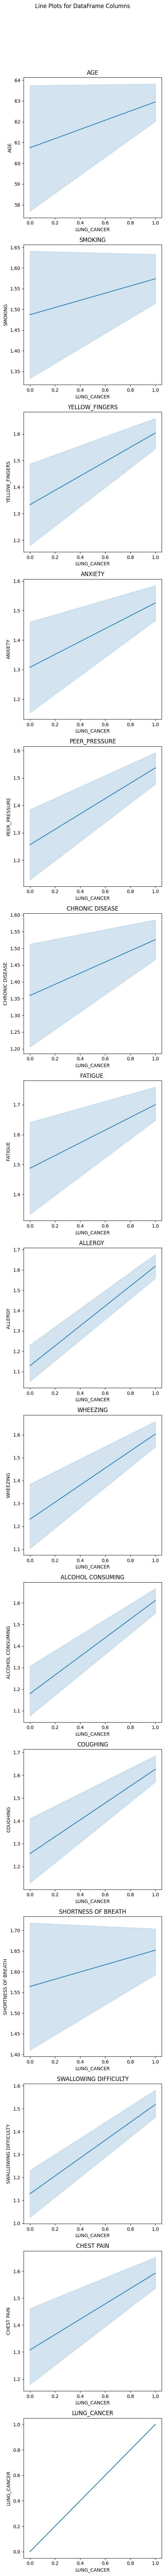

In [12]:
fig, axes = plt.subplots(nrows=len(df.columns) - 1, ncols=1, figsize=(5, 5 * (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:]):  
    sns.lineplot(x='LUNG_CANCER', y=column, data=df, ax=axes[i])
    axes[i].set_title(column)
    
plt.suptitle('Line Plots for DataFrame Columns', y=1.02)

plt.tight_layout()
plt.show()

**Make A Correlational Heatmap to watch their inter-column relation**

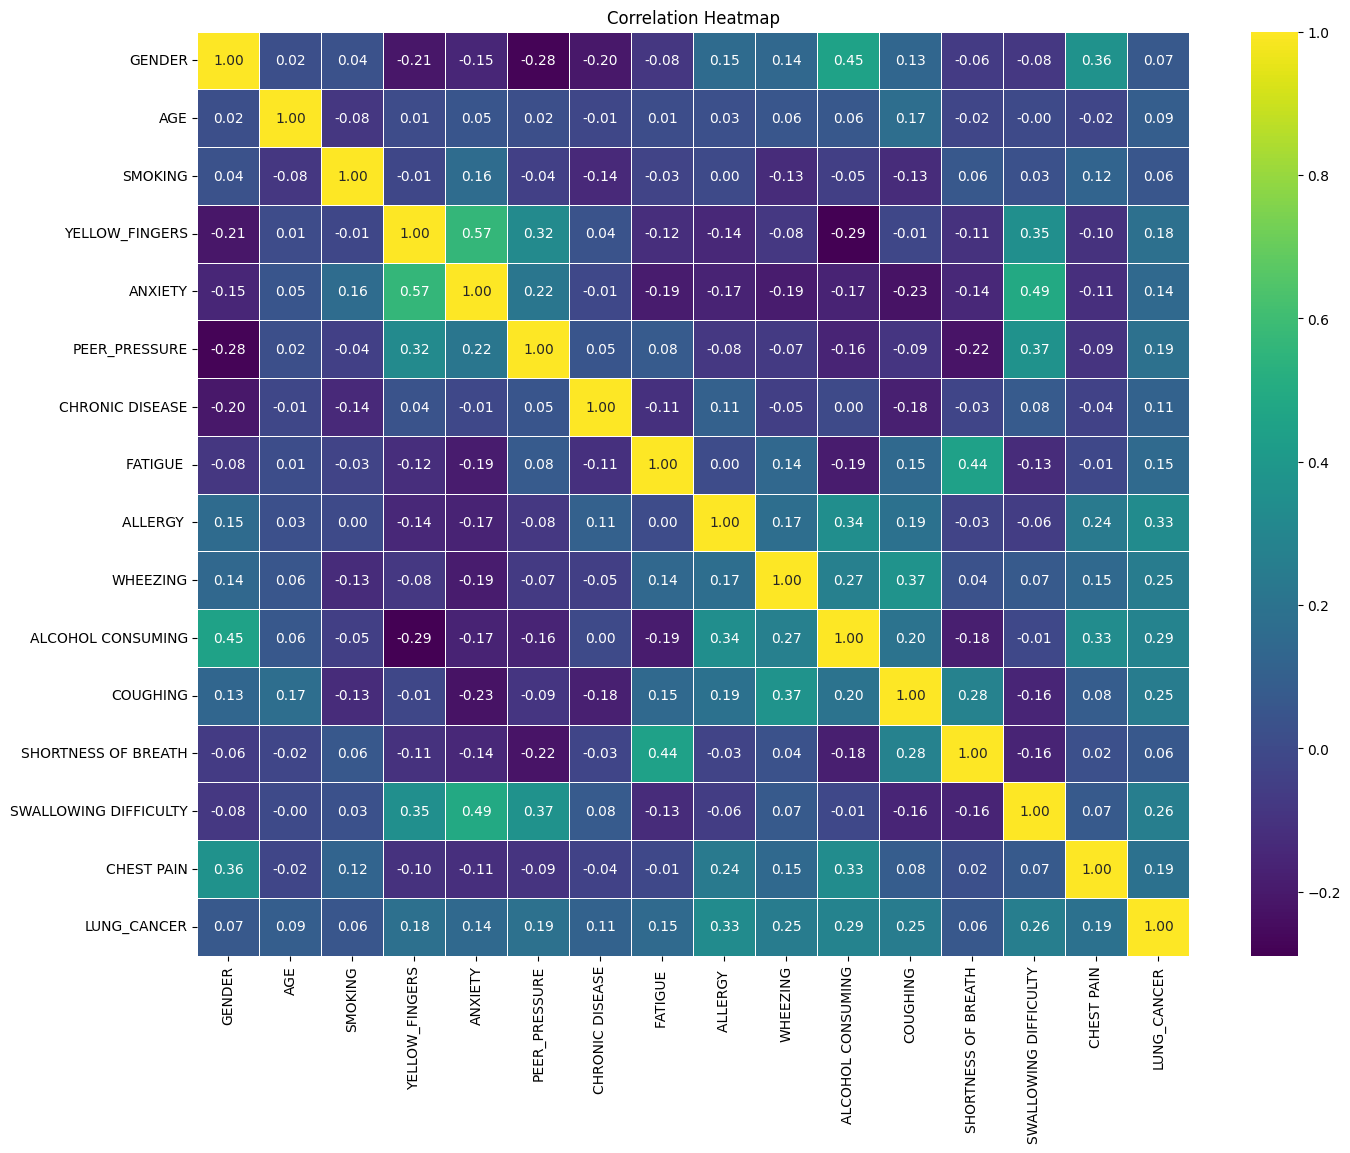

In [13]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

**Assume the intercept in linear regression for OLS regression**

In [15]:
X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the regression results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: -1.2123157998478558
Coefficient: 0.0010787857395510823


**Plot A OLS Regression to understand their statistical significance**

In [16]:
df['intercept'] = -1.2123157998478558

# Specify independent variables (X) and dependent variable (y)
X = df[['intercept', 'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LUNG_CANCER   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           7.00e-25
Time:                        05:11:47   Log-Likelihood:                -18.971
No. Observations:                 309   AIC:                             69.94
Df Residuals:                     293   BIC:                             129.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 1.00

**As here it is to be used Classifier Algorithms so Let's try in LogisticRegression**

In [17]:

X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



**Applying Support Vector Machine Algorithm**

In [18]:

X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



**Apply K-Nearest Neighbour**

In [19]:

X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']
knn_model = KNeighborsClassifier(n_neighbors=2)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9032258064516129

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.98      0.92      0.95        60

    accuracy                           0.90        62
   macro avg       0.57      0.71      0.60        62
weighted avg       0.96      0.90      0.93        62



**Apply Naive Bayes Classifier**

In [20]:
X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']
nb_model = GaussianNB()

# Fit the Naive Bayes model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9516129032258065

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



**Let's boost by Bootstrap Aggregating**

In [21]:
bagging_knn = BaggingClassifier(base_estimator=knn_model, n_estimators=10, random_state=42)
bagging_nb = BaggingClassifier(base_estimator=nb_model, n_estimators=10, random_state=42)
bagging_svm = BaggingClassifier(base_estimator=svm_model, n_estimators=10, random_state=42)

# List of classifiers
classifiers = [('Bagging_KNN', bagging_knn), ('Bagging_NB', bagging_nb), ('Bagging_SVM', bagging_svm)]

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print(f"\n{30*'='}\n{name}:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Bagging_KNN:

Accuracy: 0.9516129032258065
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62


Bagging_NB:

Accuracy: 0.9516129032258065
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62


Bagging_SVM:

Accuracy: 0.967741935483871
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98  

**Another Boosting by XGBoost**

In [22]:
X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



**Now let's ensemble three models together and apply it using stacking_model**

In [23]:
X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the StackingClassifier
stacking_model = StackingClassifier(estimators=[
    ('SVM', svm_model),
    ('XGBoost', xgb_model),
    ('RandomForest', rf_model)
], final_estimator=XGBClassifier(), cv=5)

# Fit the stacking model to the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838709677419355

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



**I haven't changed kernel,n_estimators,C value, Gradient Descent too much this can be done to improve more accuracy .From our OLS regression result we can find many insights on Data **

****XGBoost Accuracy = 96.7741935483871 % ****

****Ensemble + Stacking accuracy= 98.38% ****

**Baaging SVM = 96.77%**

**Deep Neural Network = 100%(appr.)**

In [24]:
df1=df[['LUNG_CANCER','AGE']]

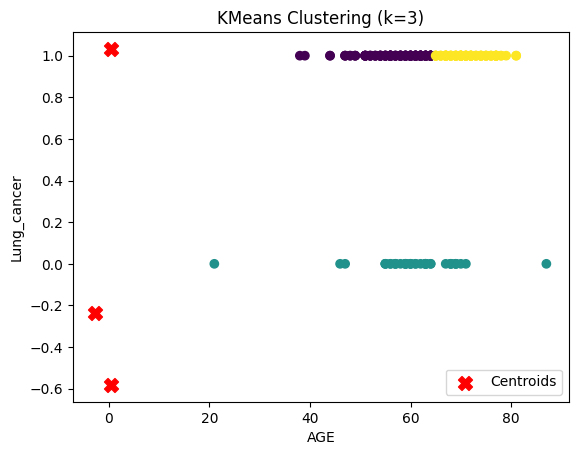

In [25]:

df1=df[['LUNG_CANCER','AGE']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
k = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters (for 2D data)
plt.scatter(df['AGE'], df['LUNG_CANCER'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.xlabel('AGE')
plt.ylabel('Lung_cancer')
plt.title(f'KMeans Clustering (k={k})')
plt.legend()
plt.show()

**From This plot we can conclude that the more age the riskier Lung cancer gets on and three clusters can be found (35-63) and high risk||(63-85) and high risk||(50-65)and low risk**

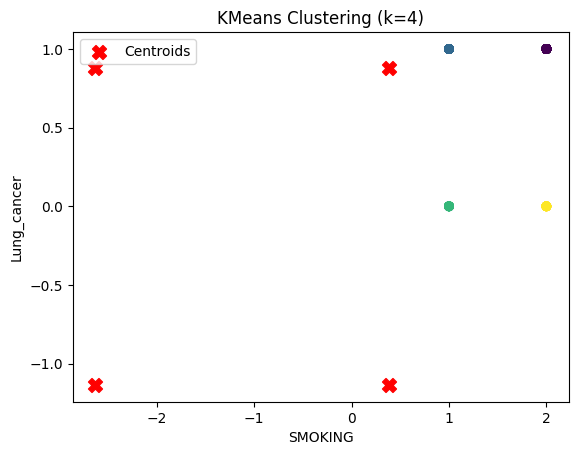

In [26]:
df2=df[['LUNG_CANCER','SMOKING']]
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
k = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df2_scaled)

# Visualize the clusters (for 2D data)
plt.scatter(df['SMOKING'], df['LUNG_CANCER'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.xlabel('SMOKING')
plt.ylabel('Lung_cancer')
plt.title(f'KMeans Clustering (k={k})')
plt.legend()
plt.show()

**Lung Cancer Risk gets higher**

**Application of Deep Learning, optimizer=adam,activation=relu, and in output layer sigmoid. In epoch it has been used 47**

In [27]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification; adjust for multi-class
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=47, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

Epoch 1/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1654 - loss: 5.8748 - val_accuracy: 0.0800 - val_loss: 2.6571
Epoch 2/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2309 - loss: 1.7305 - val_accuracy: 0.9200 - val_loss: 0.2831
Epoch 3/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8211 - loss: 0.5788 - val_accuracy: 0.9200 - val_loss: 0.3506
Epoch 4/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8310 - loss: 0.7852 - val_accuracy: 0.9200 - val_loss: 0.3615
Epoch 5/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8301 - loss: 0.7665 - val_accuracy: 0.9200 - val_loss: 0.3052
Epoch 6/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8068 - loss: 0.6803 - val_accuracy: 0.9200 - val_loss: 0.2627
Epoch 7/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8461 - loss: 0.4196 - val_accuracy: 0.9200 - val_loss: 0.3051
Epoch 8/47
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8332 - loss: 0.4254 - val_accuracy: 0.9200 - val_loss: 0.3389
Epoch 9